# **Hands-on practice lab: Model Development**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset


In [8]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [9]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [10]:
# Write your code below and press Shift+Enter to execute 
lm = LinearRegression()
X = df[['CPU_frequency']]
Y= df[['Price']]

lm.fit(X,Y)
yhat = lm.predict(X)
print(yhat[0:5])
coef=lm.coef_
print('')
print(coef)
intercept = lm.intercept_
print('')
print(intercept)
print('')
y_hat = coef + intercept*X

[[1073.07834392]
 [1277.93263722]
 [1636.42765051]
 [1073.07834392]
 [1175.50549057]]

[[1485.19362648]]

[253.66117069]



Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


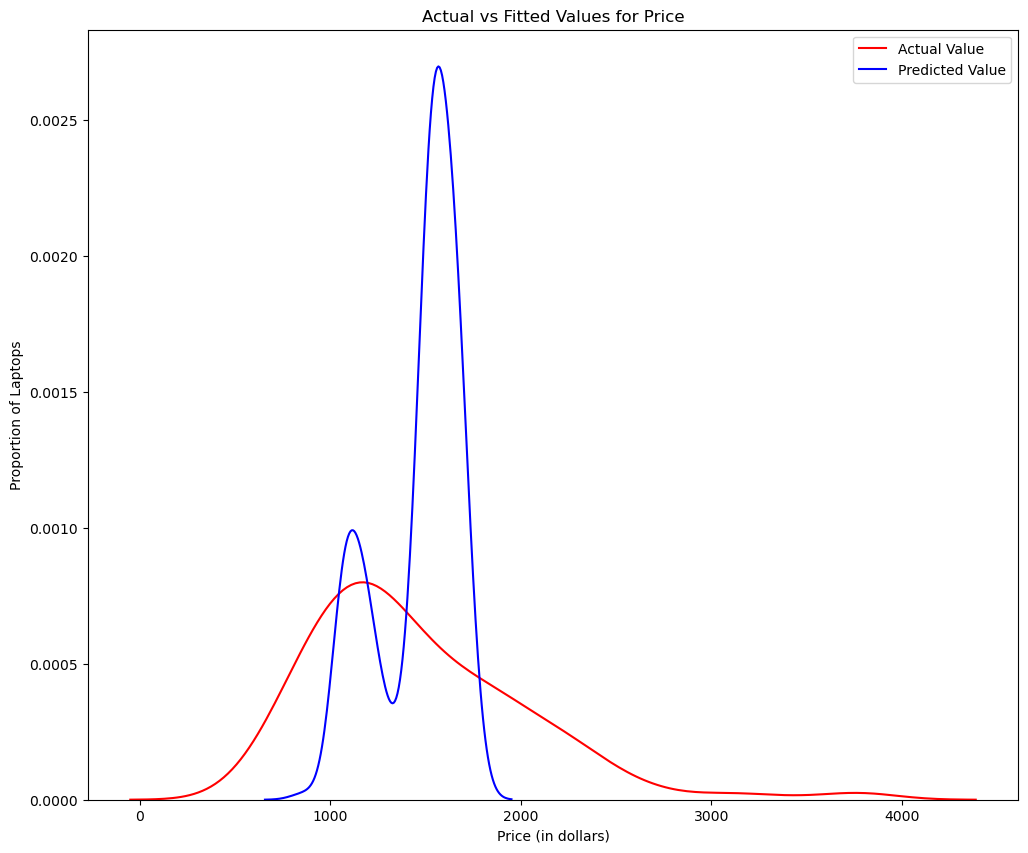

In [11]:
# Write your code below and press Shift+Enter to execute 
width = 12
height = 10
plt.figure(figsize=(width, height))
ax2 = sns.distplot(Y, hist = False , color = 'r' , label = 'Actual Value')
sns.distplot(yhat , hist = False , color = 'b' , label = 'Fitted  Value', ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value', 'Predicted Value'])

plt.show()
plt.close()

Evaluate the Mean Squared Error and R^2 score values for the model. 


In [12]:
# Write your code below and press Shift+Enter to execute 
mse = mean_squared_error(Y,yhat)
print(f'The Mean Squared Error of price and predicted value is {mse}')
print('')
print(f'The R^2 score for the Linear Regression is {lm.score(X,Y)}')

The Mean Squared Error of price and predicted value is 284583.4405868629

The R^2 score for the Linear Regression is 0.1344436321024326


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [13]:
# Write your code below and press Shift+Enter to execute 
lm_mlr = LinearRegression()
Z= df[['CPU_frequency','RAM_GB', 'Storage_GB_SSD','CPU_core', 'OS', 'GPU', 'Category']]
Y = df[["Price"]]
lm_mlr.fit(Z,Y)
lm_mlr.coef_
lm_mlr.intercept_
Y_hat = lm_mlr.predict(Z)


Plot the Distribution graph of the predicted values as well as the Actual values


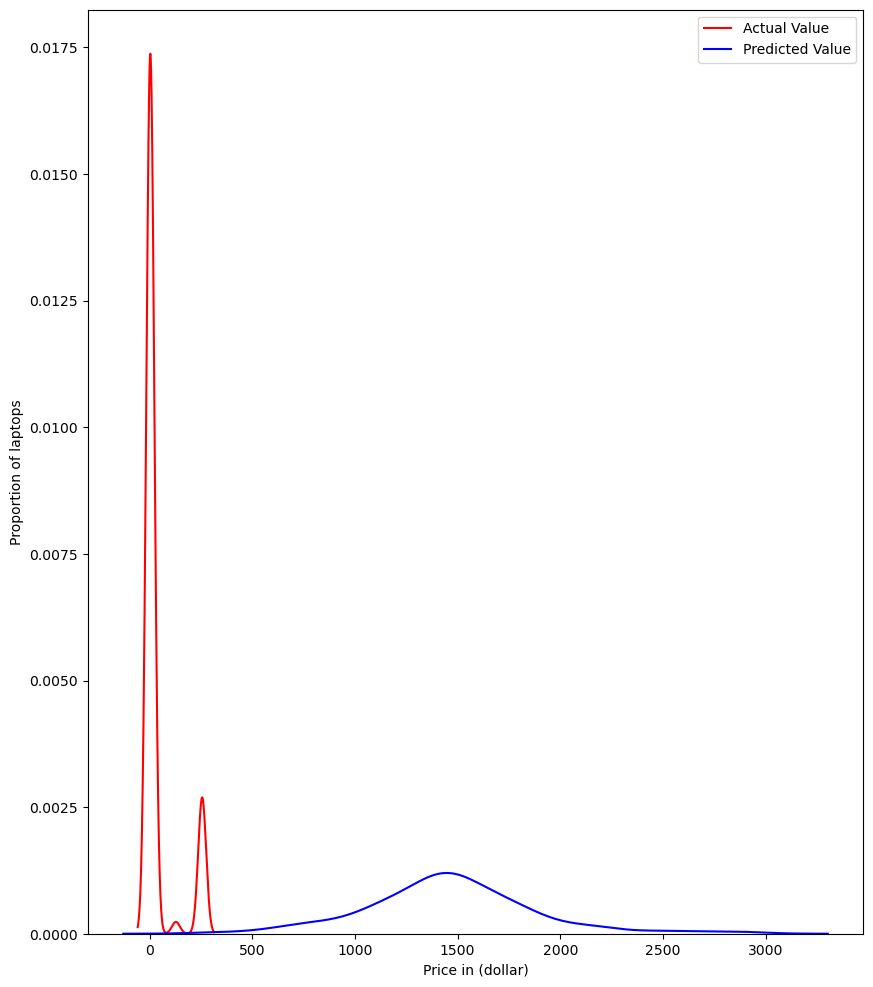

In [27]:
# Write your code below and press Shift+Enter to execute
width = 10
height = 12
plt.figure(figsize=(width, height))
ax3 = sns.distplot(Z, hist= False, color = 'red' , label = "Actual Value")
sns.distplot(Y_hat, hist= False , color ='blue', label = 'Fitted Value' , ax = ax3)

plt.xlabel("Price in (dollar)")
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()
plt.close()

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [15]:
# Write your code below and ress Shift+Enter to execute
mse_mlr = mean_squared_error(Y_hat,Y)
print(f'The Mean_Squared_Error of the Multiple Linear Regression is {mse_mlr}')
print('')
print(f'The R^2 of the Multiple Linear Regression is {lm_mlr.score(Z,Y)}')


The Mean_Squared_Error of the Multiple Linear Regression is 161680.57263893113

The R^2 of the Multiple Linear Regression is 0.5082509055187372


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [16]:
#  Write your code below and press Shift+Enter to execute
x = df["CPU_frequency"]
y= df["Price"]
f1 = np.polyfit(x,y,1)
p1 = np.poly1d(f1)
print(p1)
print("")

f2 = np.polyfit(x,y,2)
p2 = np.poly1d(f2)
print(p2)
print("")

f3 = np.polyfit(x,y,3)
p3 = np.poly1d(f3)
print(p3)
print("")

f5 = np.polyfit(x,y,5)
p5 = np.poly1d(f5)
print(p5)

 
1485 x + 253.7

           2
1.191e+04 x - 1.643e+04 x + 6703

           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238

           5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [17]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')
    plt.show()
    plt.close()

Call this function for the 3 models created and get the required graphs.


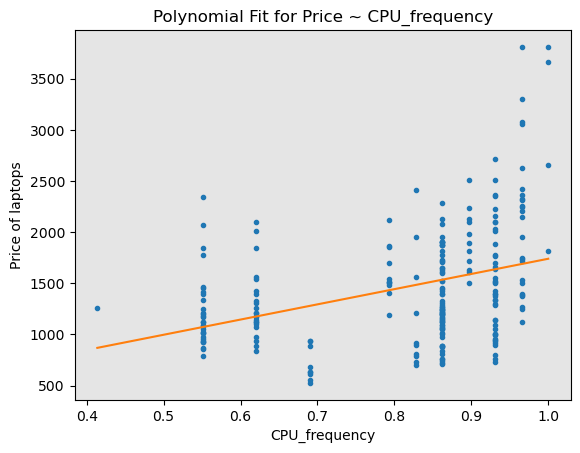

In [18]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 1
PlotPolly(p1,x,y, "CPU_frequency")

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p1, X, Y, 'CPU_frequency')
```

</details>


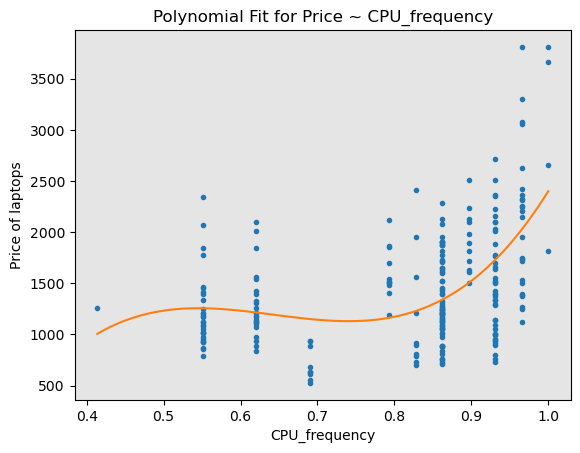

In [19]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 3
PlotPolly(p3,x,y, "CPU_frequency")

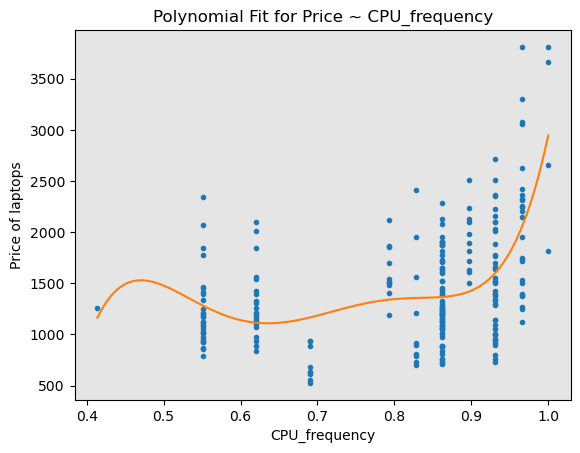

In [20]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 5
PlotPolly(p5,x,y, "CPU_frequency")

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [21]:
#  Write your code below and press Shift+Enter to execute
polynomials = {1: p1, 3: p3, 5: p5}
for i, p in polynomials.items():
    r_squared = r2_score(y, p(x))
    mse= mean_squared_error(df['Price'], p(x))
    print(f'The Mean Square Error for p{i}(x) is {mse}')
    print(f'The R-square value for p{i}(x)  is: {r_squared}')
    print('')

The Mean Square Error for p1(x) is 284583.4405868629
The R-square value for p1(x)  is: 0.1344436321024326

The Mean Square Error for p3(x) is 241024.8630384881
The R-square value for p3(x)  is: 0.26692640796530986

The Mean Square Error for p5(x) is 229137.29548052172
The R-square value for p5(x)  is: 0.3030822706444306



# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [22]:
#  Write your code below and press Shift+Enter to execute
input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias = False)),
    ('model', LinearRegression())
]

pipe = Pipeline(input)
pipe
Z=Z.astype(float)
pipe.fit(Z,y)
ypipe= pipe.predict(Z)



Evaluate the MSE and R^2 values for the this predicted output.


In [23]:
#  Write your code below and press Shift+Enter to execute
mse_pipe = mean_squared_error(df['Price'],ypipe)
print(f'The Mean_Squared_Error for the  polynomialfeature pipeline is: {mse}')
print('')
print(f'The R^2 for the polynomial pipeline is: {r2_score(Y,ypipe)}')

The Mean_Squared_Error for the  polynomialfeature pipeline is: 229137.29548052172

The R^2 for the polynomial pipeline is: 0.6332094535859659


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|--!>
